# Name : Asad ullah
# Batch : DS2312

**Project Description**
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

**Attribute Information**
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [187]:
df= pd.read_csv('titanic_train (1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [188]:
df.shape

(891, 12)

In [189]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [190]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [191]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [192]:
Age_mean= df['Age'].mean()
Age_mean

29.69911764705882

In [193]:
df['Age'].fillna(value=29, inplace=True)

In [194]:
df['Cabin'].fillna(value='Unknown', inplace= True)

In [195]:
df['Embarked'].fillna(value='C', inplace=True)

In [196]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [197]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Age
29.00    197
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
36.50      1
55.50      1
0.92       

In [198]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [199]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [200]:
df=df.drop(['PassengerId','Name','Ticket','Fare'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,Unknown,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,Unknown,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,Unknown,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,Unknown,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,29.0,1,2,Unknown,S
889,1,1,male,26.0,0,0,C148,C


**Univariate Analysis**

Survived
0    549
1    342
Name: count, dtype: int64


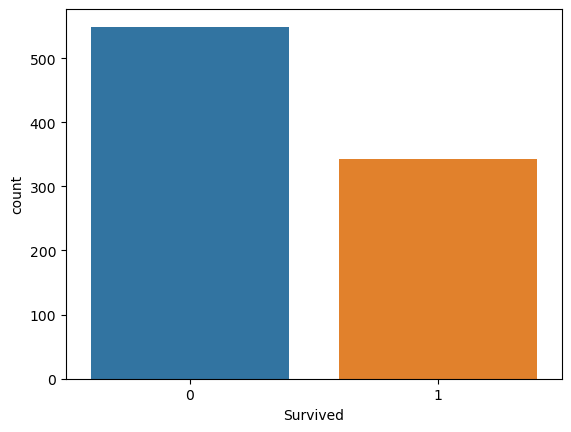

In [201]:
ax= sns.countplot(x='Survived', data=df)
print(df['Survived'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


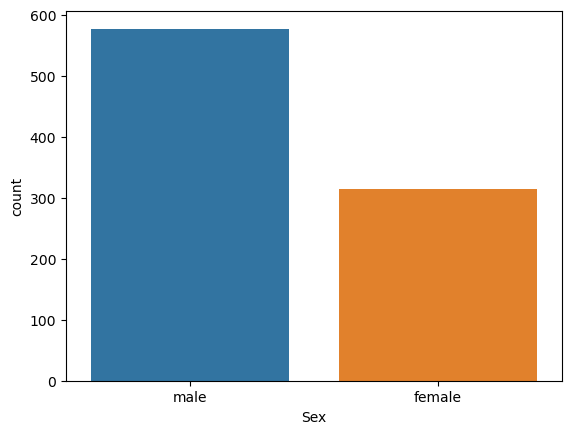

In [202]:
ax= sns.countplot(x='Sex', data=df)
print(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


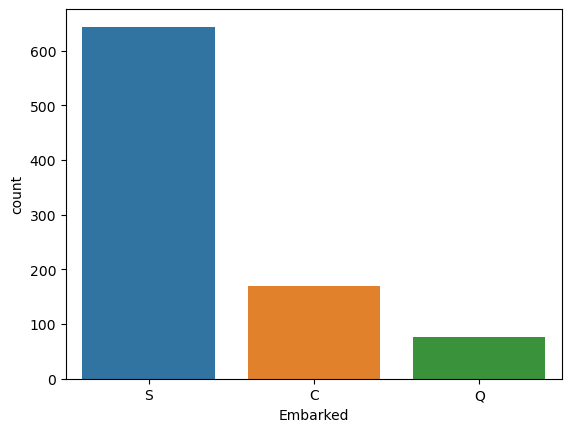

In [203]:
ax= sns.countplot(x='Embarked', data=df)
print(df['Sex'].value_counts())

In [204]:
#Checking for categorical columns
categorical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")


#Checking for Numerical columns
numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['Sex', 'Cabin', 'Embarked']


Numerical Columns:  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']




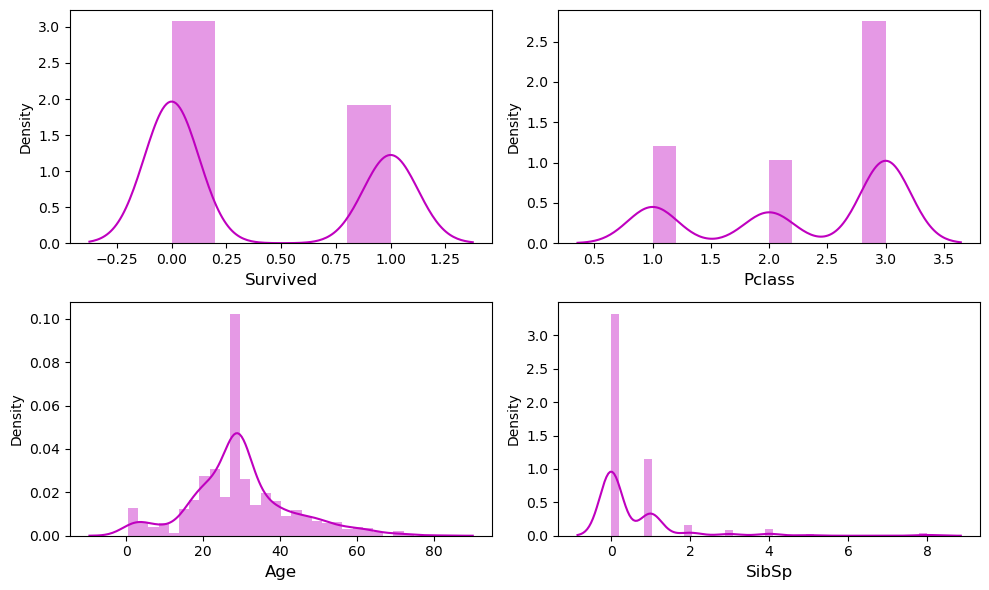

In [205]:
#Let's check how data has been distributed in remaining columns
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [163]:
#Data distributed normal

There are outliers in data but in Age and SibSp which we cannot change 


# Encoding Categorical columns

In [211]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1.0,22.0,1,0,147.0,2.0
1,1,1,0.0,38.0,1,0,81.0,0.0
2,1,3,0.0,26.0,0,0,147.0,2.0
3,1,1,0.0,35.0,1,0,55.0,2.0
4,0,3,1.0,35.0,0,0,147.0,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,147.0,2.0
887,1,1,0.0,19.0,0,0,30.0,2.0
888,0,3,0.0,29.0,1,2,147.0,2.0
889,1,1,1.0,26.0,0,0,60.0,0.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [167]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.560236,0.523008,0.381594,130.744108,1.531987
std,0.486592,0.836071,0.477990,13.005010,1.102743,0.806057,36.024237,0.794531
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,147.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,147.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,147.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,147.000000,2.000000


**Corelation between label and features**

In [214]:
x= df.drop("Survived", axis=1)
y= df["Survived"]

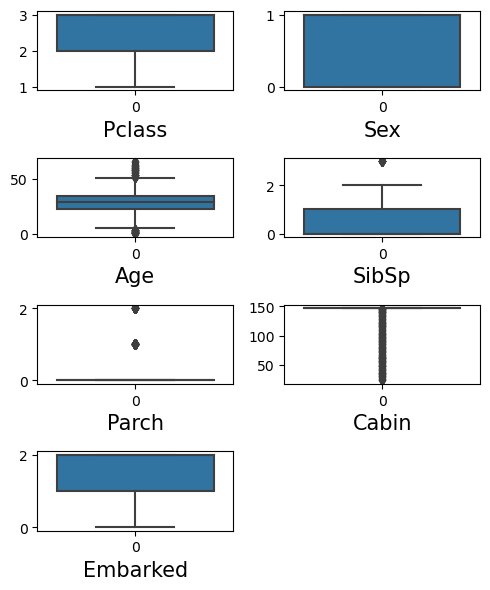

In [215]:
plt.figure(figsize=(5,6))
plotnumber=1
for col in x:
    if plotnumber<=7:
        ax= plt.subplot(4,2, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [216]:
from scipy.stats import zscore
z_score= zscore(df)
abs_z_score = np.abs(z_score)  #Apply formula to get scalled data
filtering_entry= (abs_z_score<3).all(axis=1) # we want 3 scaler standard so we consider 3
df= df[filtering_entry]
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,0.381323,2.360571,0.666667,29.505409,0.308690,0.239948,137.373541,1.544747
std,0.486027,0.799156,0.471711,11.715703,0.527838,0.551985,24.048123,0.782276
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,43.000000,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,147.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,147.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,147.000000,2.000000
max,1.000000,3.000000,1.000000,65.000000,2.000000,2.000000,147.000000,2.000000


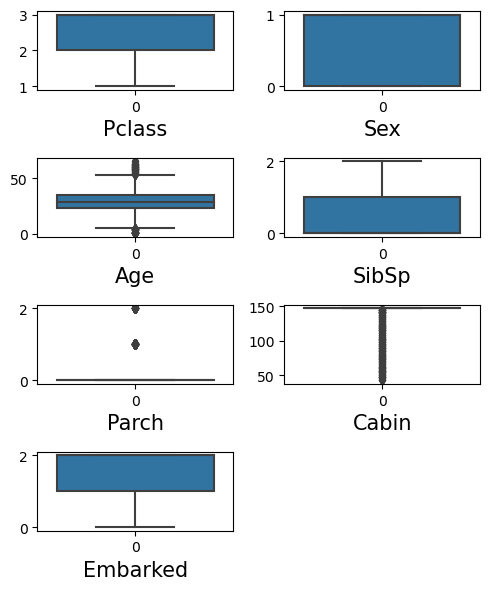

In [217]:
plt.figure(figsize=(5,6))
plotnumber=1
for col in x:
    if plotnumber<=7:
        ax= plt.subplot(4,2, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

Finding corelation between features and label

In [171]:
cor= df.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.067814,-0.035322,0.081629,-0.254888,-0.174199
Pclass,-0.338481,1.000000,0.131900,-0.334974,0.083081,0.018443,0.684121,0.170334
Sex,-0.543351,0.131900,1.000000,0.082949,-0.114631,-0.245489,0.096681,0.115513
Age,-0.067814,-0.334974,0.082949,1.000000,-0.232978,-0.176486,-0.237722,-0.032265
SibSp,-0.035322,0.083081,-0.114631,-0.232978,1.000000,0.414838,0.043593,0.070653
Parch,0.081629,0.018443,-0.245489,-0.176486,0.414838,1.000000,-0.028324,0.042325
Cabin,-0.254888,0.684121,0.096681,-0.237722,0.043593,-0.028324,1.000000,0.218981
Embarked,-0.174199,0.170334,0.115513,-0.032265,0.070653,0.042325,0.218981,1.000000


**Visualise corelation by plotting heatmap**

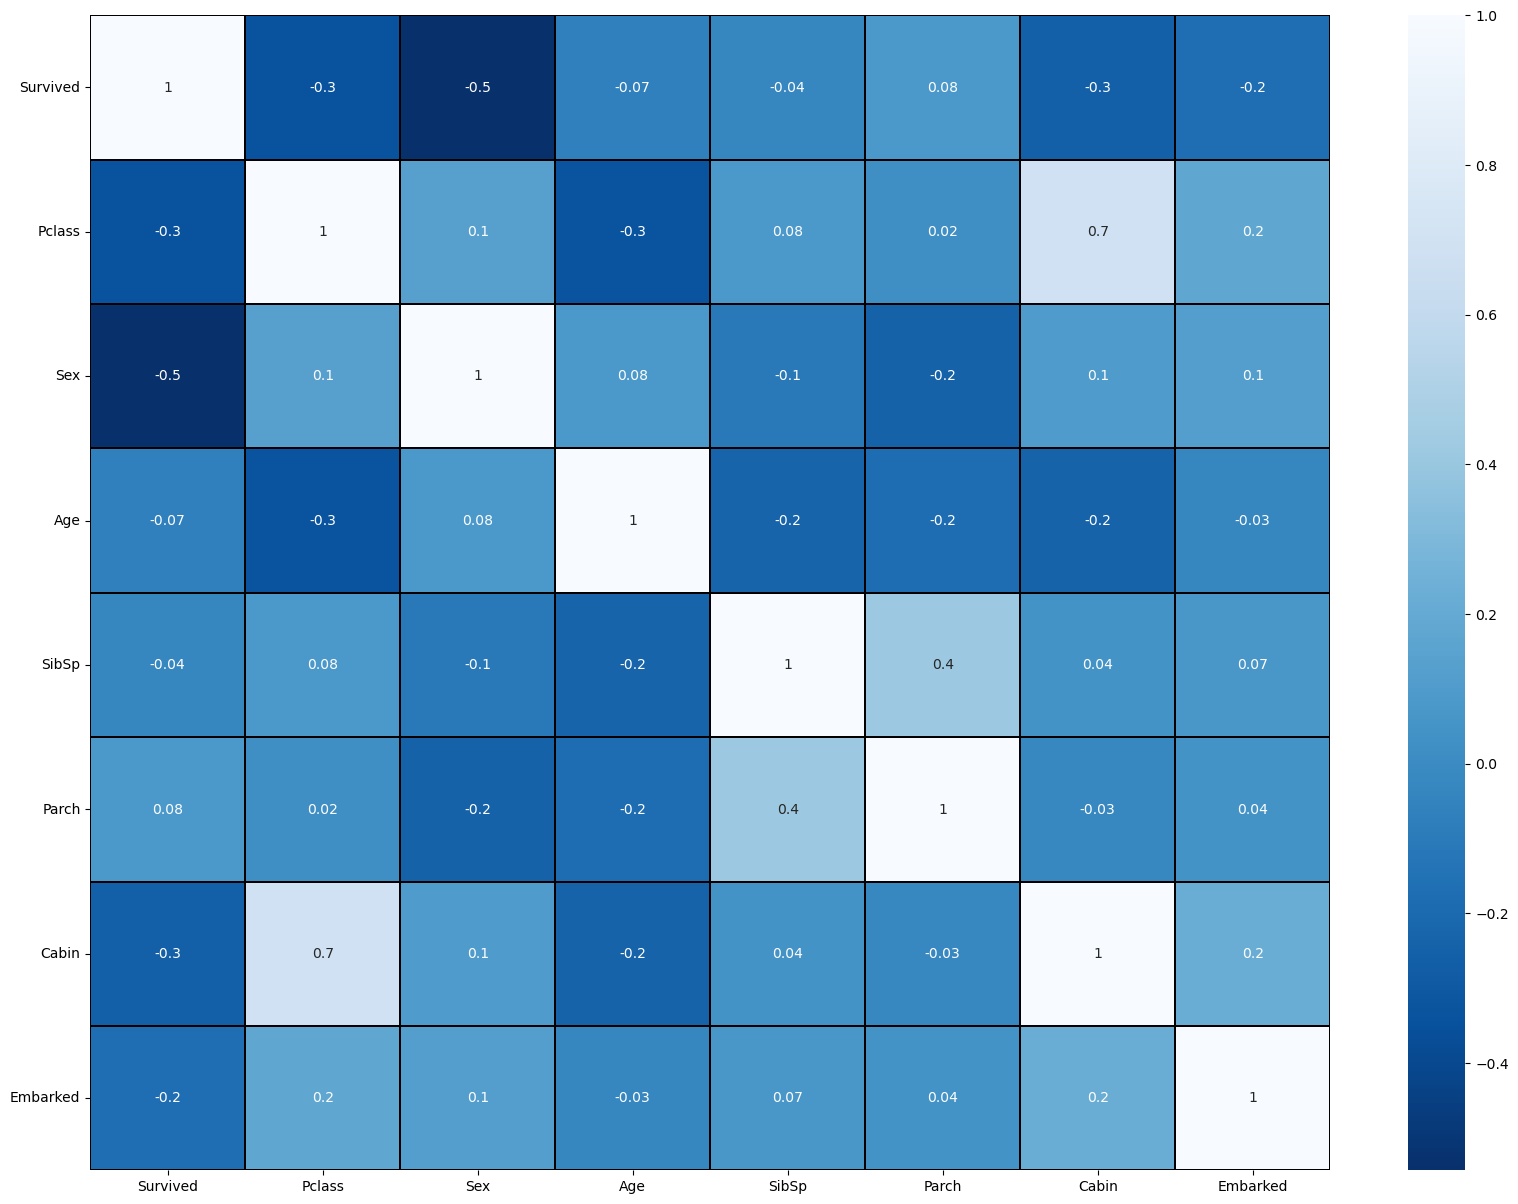

In [172]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor='black', annot=True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

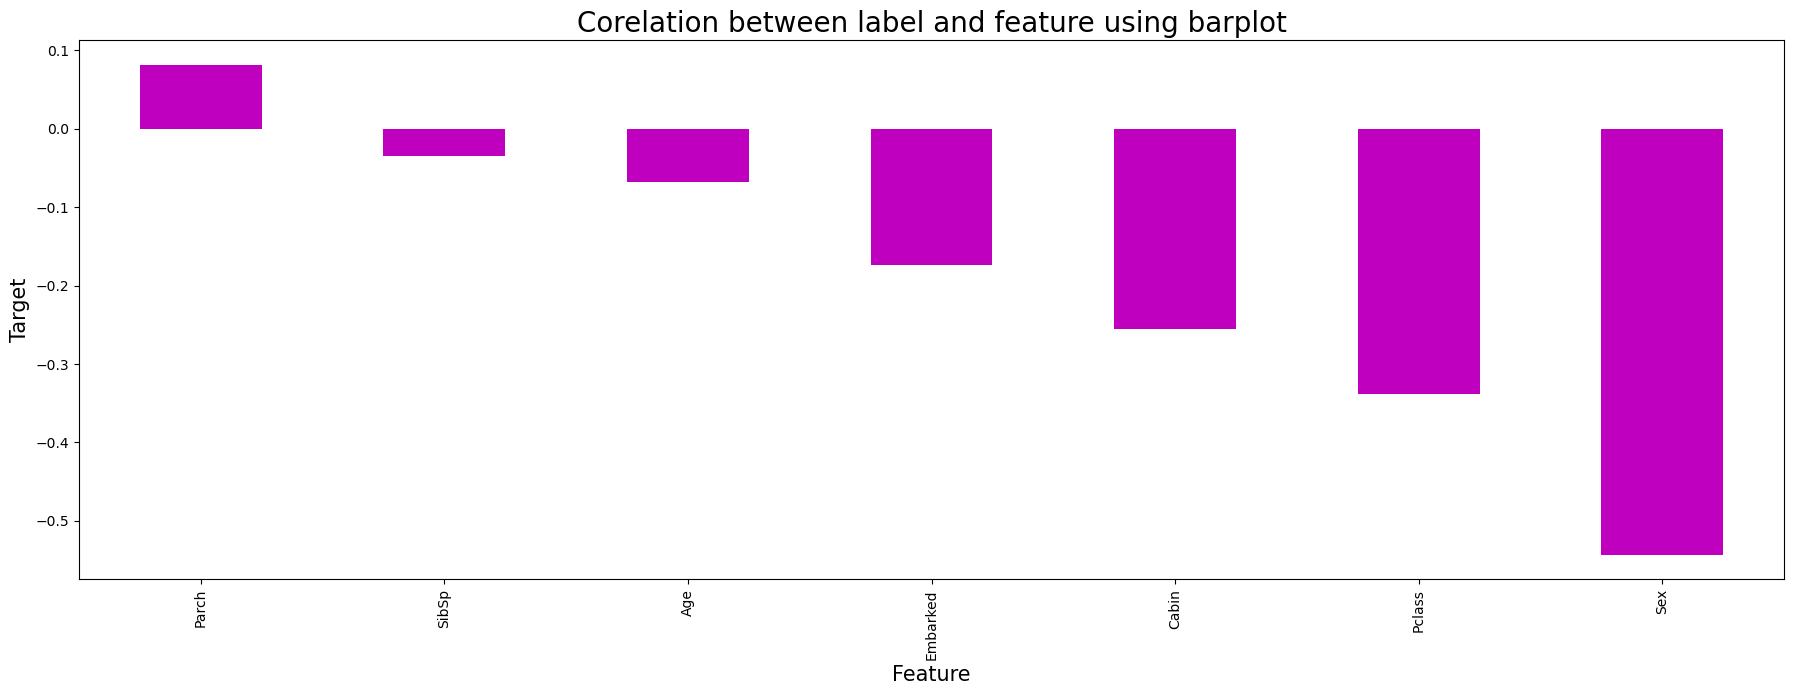

In [174]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Corelation between label and feature using barplot", fontsize=20)
plt.show()

In [175]:
cor['Survived'].sort_values(ascending=False)

Survived    1.000000
Parch       0.081629
SibSp      -0.035322
Age        -0.067814
Embarked   -0.174199
Cabin      -0.254888
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [219]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0.828165,0.733305,-0.620312,0.988125,-0.463308,0.435372,0.591168
1,-1.604102,-1.363690,0.716323,0.988125,-0.463308,-1.740882,-1.924768
2,0.828165,-1.363690,-0.286154,-0.563555,-0.463308,0.435372,0.591168
3,-1.604102,-1.363690,0.465704,0.988125,-0.463308,-2.598194,0.591168
4,0.828165,0.733305,0.465704,-0.563555,-0.463308,0.435372,0.591168
...,...,...,...,...,...,...,...
810,-0.387969,0.733305,-0.202614,-0.563555,-0.463308,0.435372,0.591168
811,-1.604102,-1.363690,-0.870932,-0.563555,-0.463308,-3.422533,0.591168
812,0.828165,-1.363690,-0.035535,0.988125,2.985055,0.435372,0.591168
813,-1.604102,0.733305,-0.286154,-0.563555,-0.463308,-2.433327,-1.924768


In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.975665,Pclass
1,1.124110,Sex
2,1.244483,Age
3,1.172742,SibSp
4,1.273993,Parch
5,1.861681,Cabin
6,1.057935,Embarked


Vif values looks normal it means no multicolinearity pronlem

# Model Building

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred= RFR.predict(x_test)
    acc= accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS=i
print("Best Accuracy is ", maxAccu,"at random state", maxRS)

Best Accuracy is  0.8530612244897959 at random state 189


**Linear Regression**

In [225]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [226]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [227]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8163265306122449
[[135  15]
 [ 30  65]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       150
           1       0.81      0.68      0.74        95

    accuracy                           0.82       245
   macro avg       0.82      0.79      0.80       245
weighted avg       0.82      0.82      0.81       245



**Random Forest Classifier**

In [230]:
RF= RandomForestClassifier()
RF.fit(x_train, y_train)
predRF= RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8571428571428571
[[134  16]
 [ 19  76]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       150
           1       0.83      0.80      0.81        95

    accuracy                           0.86       245
   macro avg       0.85      0.85      0.85       245
weighted avg       0.86      0.86      0.86       245



**GradientBoost Classifier**

In [231]:
GB= GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8571428571428571
[[136  14]
 [ 21  74]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       150
           1       0.84      0.78      0.81        95

    accuracy                           0.86       245
   macro avg       0.85      0.84      0.85       245
weighted avg       0.86      0.86      0.86       245



**AdaBoost Classifier**

In [232]:
AB= AdaBoostClassifier()
AB.fit(x_train, y_train)
predAB= AB.predict(x_test)
print(accuracy_score(y_test, predAB))
print(confusion_matrix(y_test, predAB))
print(classification_report(y_test, predAB))

0.8244897959183674
[[130  20]
 [ 23  72]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       150
           1       0.78      0.76      0.77        95

    accuracy                           0.82       245
   macro avg       0.82      0.81      0.81       245
weighted avg       0.82      0.82      0.82       245



**Extra Tree Classifier**

In [233]:
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8367346938775511
[[137  13]
 [ 27  68]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       150
           1       0.84      0.72      0.77        95

    accuracy                           0.84       245
   macro avg       0.84      0.81      0.82       245
weighted avg       0.84      0.84      0.83       245



To check the model is overift or not let validate by cross validation

**Cross Validation Score**

In [234]:
from sklearn.model_selection import cross_val_score

cv=5 it is fold 5 value
cross_val_score(modelname, feature, label, cv=foldvalue, scoring = accuracy)

In classification algorithm default score parameter is accuracy
for regression default parameter is r2 score


In [236]:
#Checking for cross validation score for Random Forest
score= cross_val_score(RF, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predRF)-score.mean())


[0.74846626 0.80368098 0.80368098 0.79141104 0.80981595]
<built-in method mean of numpy.ndarray object at 0x139bbbf90>
Difference between Accuracy score and Cross validation score 0.06573181419807184


In [237]:
#Checking for cross validation score for Logistic Regression
score= cross_val_score(LR, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predLR)-score.mean())


[0.79141104 0.80368098 0.7791411  0.80981595 0.80368098]
<built-in method mean of numpy.ndarray object at 0x139bdda10>
Difference between Accuracy score and Cross validation score 0.018780518342306207


In [238]:
#Checking for cross validation score for Gradient Boosting
score= cross_val_score(GB, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predGB)-score.mean())


[0.79141104 0.81595092 0.82822086 0.81595092 0.84662577]
<built-in method mean of numpy.ndarray object at 0x139b0dbf0>
Difference between Accuracy score and Cross validation score 0.03751095530236637


In [239]:
#Checking for cross validation score for Ada Boost
score= cross_val_score(AB, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predAB)-score.mean())


[0.76687117 0.80981595 0.80981595 0.81595092 0.8404908 ]
<built-in method mean of numpy.ndarray object at 0x139beff30>
Difference between Accuracy score and Cross validation score 0.015900838863152633


In [240]:
# Checking for cross validation score for Extra tree
score= cross_val_score(ET, x,y)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predET)-score.mean())


[0.73619632 0.78527607 0.79754601 0.7791411  0.80981595]
<built-in method mean of numpy.ndarray object at 0x13713d770>
Difference between Accuracy score and Cross validation score 0.055139601853011144


As we see Extra tree give us high accuracy we will consider Extra tree for tunning

# Hyper Parameter Tunning

In [241]:
#Extra tree classifier
from sklearn.model_selection import GridSearchCV

parameters= {'criterion':['gini', 'entropy'],
              'random_state':[10,50,1000],
             'max_depth':[0, 10, 20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [242]:
GCV= GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [243]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [244]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [245]:
Final_model=ExtraTreesClassifier(criterion = 'gini' , max_depth = 20, n_estimators= 300,n_jobs= -2,random_state= 50)
Final_model.fit(x_train, y_train)
pred= Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)


84.48979591836735


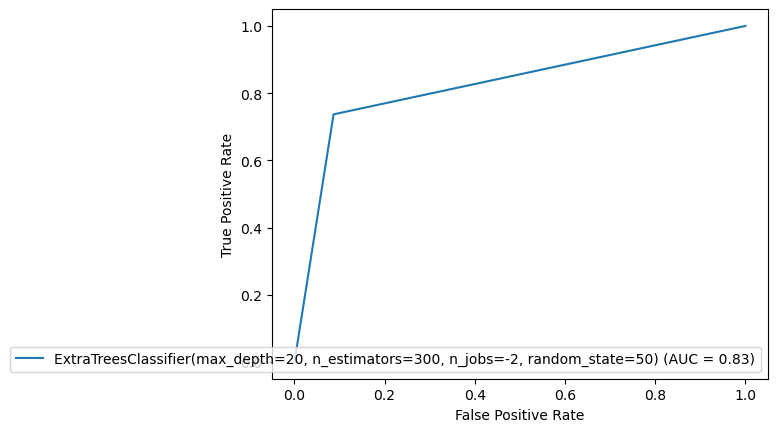

In [246]:
from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc= metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr= tpr, roc_auc=roc_auc, estimator_name= Final_model)
display.plot()